# Tone Curve
We implement a natural cubic curve with anchors at $x_i \in \{ 0.0, 0.33, 0.67, 1.0 \}$. The $y$ positions of the curve at each $x_i$ are provided by the client. We begin with a piecewise linear curve:

## Linear Curve
We begin with a linear ramp on $[0.0, 1.0]$:

In [104]:
from torch import linspace, tensor

t = tensor([ 0., 0.33, 0.66, 1. ])
x = linspace(0., 1., 100)
x

tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
        0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
        0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
        0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
        0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
        0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
        0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
        0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
        0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
        0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
        1.0000])

In [92]:
from torch import where

def piecewise_linear (x, t):
    d = 1. / 3.
    m_1 = (t[1] - t[0]) / d
    m_2 = (t[2] - t[1]) / d
    m_3 = (t[3] - t[2]) / d
    y_1 = m_1 * x + t[0]
    y_2 = m_2 * (x - d) + t[1]
    y_3 = m_3 * (x - 1.) + t[3]
    y = where(x > d, y_2, y_1)
    y = where(x > 2. * d, y_3, y)
    return y

In [93]:
y_linear = piecewise_linear(x, t)
y_linear

tensor([0.0000, 0.0061, 0.0121, 0.0182, 0.0242, 0.0303, 0.0364, 0.0424, 0.0485,
        0.0545, 0.0606, 0.0667, 0.0727, 0.0788, 0.0848, 0.0909, 0.0970, 0.1030,
        0.1091, 0.1152, 0.1212, 0.1273, 0.1333, 0.1394, 0.1455, 0.1515, 0.1576,
        0.1636, 0.1697, 0.1758, 0.1818, 0.1879, 0.1939, 0.2000, 0.2212, 0.2424,
        0.2636, 0.2848, 0.3061, 0.3273, 0.3485, 0.3697, 0.3909, 0.4121, 0.4333,
        0.4545, 0.4758, 0.4970, 0.5182, 0.5394, 0.5606, 0.5818, 0.6030, 0.6242,
        0.6455, 0.6667, 0.6879, 0.7091, 0.7303, 0.7515, 0.7727, 0.7939, 0.8152,
        0.8364, 0.8576, 0.8788, 0.9000, 0.9030, 0.9061, 0.9091, 0.9121, 0.9152,
        0.9182, 0.9212, 0.9242, 0.9273, 0.9303, 0.9333, 0.9364, 0.9394, 0.9424,
        0.9455, 0.9485, 0.9515, 0.9545, 0.9576, 0.9606, 0.9636, 0.9667, 0.9697,
        0.9727, 0.9758, 0.9788, 0.9818, 0.9848, 0.9879, 0.9909, 0.9939, 0.9970,
        1.0000])

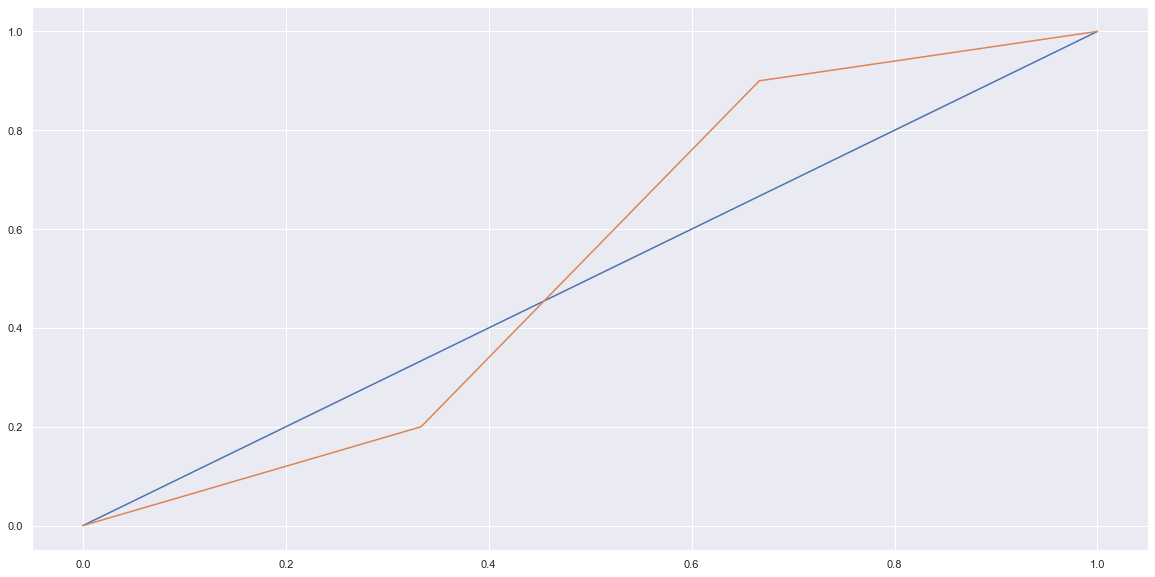

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(x, x)
sns.lineplot(x, y_linear)
plt.show()

## Cubic Curve

In [101]:
def cubic (x, t):
    d = 1. / 3.
    x_1, x_2, x_3, x_4 = 0, d, 2. * d, 1.
    # Linear
    m_1 = (t[1] - t[0]) / d
    m_2 = (t[2] - t[1]) / d
    m_3 = (t[3] - t[2]) / d
    y_1 = m_1 * x + t[0]
    y_2 = m_2 * (x - d) + t[1]
    y_3 = m_3 * (x - 1.) + t[3]
    # Cubic corrections
    z_2 = 6 * (m_3 * x_2 + m_2 * x_3 - m_3 * x_3 + 2 * m_2 * x_4 + 2 * m_1 * x_2 - 2 * m_1 * x_4 - 3 * m_2 * x_2) / (4 * (x_1 * x_2 + x_3 * x_4 - x_1 * x_4) - (x_2 + x_3) ** 2)
    z_3 = 6 * (m_2 * x_2 + m_1 * x_3 - m_1 * x_2 + 2 * m_2 * x_1 + 2 * m_3 * x_3 - 2 * m_3 * x_1 - 3 * m_2 * x_3) / (4 * (x_1 * x_2 + x_3 * x_4 - x_1 * x_4) - (x_2 + x_3) ** 2)
    a_1 = z_2 / (6 * (x_1 - x_2))
    b_1 = 2 * z_2 / (6 * (x_2 - x_1))
    a_2 = (2 * z_2 + z_3) / (6 * (x_2 - x_3))
    b_2 = (2 * z_3 + z_2) / (6 * (x_3 - x_2))
    a_3 = z_3 / (3 * (x_3 - x_4))
    b_3 = z_3 / (6 * (x_4 - x_3))
    c_1 = a_1 * (x - x_2) ** 2 * (x - x_1) + b_1 * (x - x_2) * (x - x_1) ** 2
    c_2 = a_2 * (x - x_3) ** 2 * (x - x_2) + b_2 * (x - x_3) * (x - x_2) ** 2
    c_3 = a_3 * (x - x_4) ** 2 * (x - x_3) + b_3 * (x - x_4) * (x - x_3) ** 2
    # Compute final curve
    y = where(x > x_2, y_2 + c_2, y_1 + c_1)
    y = where(x > x_3, y_3 + c_3, y)
    return y

\begin{align}
z_{2}=6\frac{m_{3}x_{2}+m_{2}x_{3}-m_{3}x_{3}+2m_{2}x_{4}+2m_{1}x_{2}-2m_{1}x_{4}-3m_{2}x_{2}}{4(x_{1}x_{2}+x_{3}x_{4}-x_{1}x_{4})-(x_{2}+x_{3})^{2}}
\end{align}

In [105]:
y_cubic = cubic(x, t)
y_cubic

tensor([0.0000, 0.0100, 0.0200, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0802,
        0.0902, 0.1002, 0.1102, 0.1202, 0.1302, 0.1402, 0.1502, 0.1602, 0.1703,
        0.1803, 0.1903, 0.2003, 0.2103, 0.2202, 0.2302, 0.2402, 0.2502, 0.2602,
        0.2702, 0.2802, 0.2901, 0.3001, 0.3101, 0.3200, 0.3300, 0.3400, 0.3499,
        0.3599, 0.3698, 0.3798, 0.3897, 0.3997, 0.4096, 0.4196, 0.4295, 0.4395,
        0.4494, 0.4594, 0.4693, 0.4793, 0.4893, 0.4992, 0.5092, 0.5192, 0.5292,
        0.5392, 0.5492, 0.5592, 0.5693, 0.5793, 0.5893, 0.5994, 0.6095, 0.6195,
        0.6296, 0.6397, 0.6499, 0.6600, 0.6701, 0.6803, 0.6905, 0.7007, 0.7109,
        0.7211, 0.7313, 0.7416, 0.7518, 0.7621, 0.7723, 0.7826, 0.7929, 0.8032,
        0.8135, 0.8238, 0.8342, 0.8445, 0.8548, 0.8652, 0.8755, 0.8859, 0.8962,
        0.9066, 0.9170, 0.9273, 0.9377, 0.9481, 0.9585, 0.9689, 0.9792, 0.9896,
        1.0000])

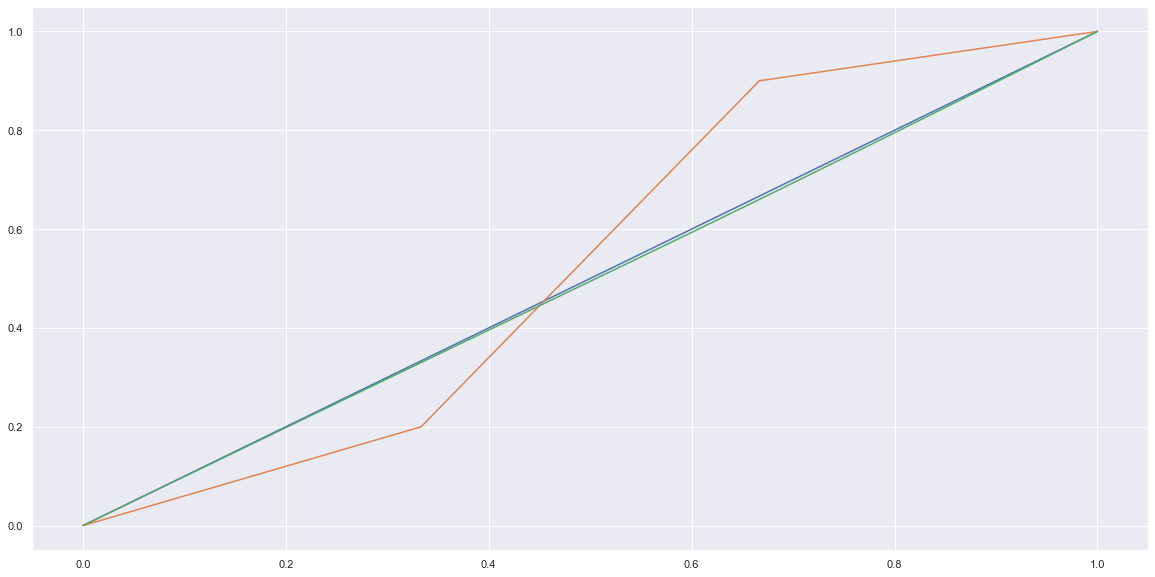

In [106]:
sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(x, x)
sns.lineplot(x, y_linear)
sns.lineplot(x, y_cubic)
plt.show()